# Day 7: Physical (Ditribution) - Ultraviolet Catastrophe

Source: https://liu-group.github.io/interactive-ultraviolet/

## Cargar librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import altair as alt
import scipy

## Fórmula

$$\rho(\nu, T)_{\mathrm{Planck}} = \dfrac{8\pi h \nu^{3}}{ c^{3} \left( e^{\frac{h\nu}{k_{B} T}} - 1 \right)}$$

In [2]:
def rho_planck(nu,T):
    h = scipy.constants.h
    c = scipy.constants.speed_of_light
    kB = scipy.constants.Boltzmann
    numerator = 8 * np.pi * h * (nu**3)
    denominator = (c**3) * ( np.exp( (h * nu)/(kB*T) ) - 1 )
    rho = numerator/denominator
    return rho

## Crear conjunto de datos

In [35]:
# Definimos lista de temperaturas
arr_temperatures = np.arange(100,1500,300)

# Definimos el rango de nu
arr_nu = np.logspace(np.log10(1e12), np.log10(1e15), num=1000, endpoint=True)

# Iteramos por temperaturas para crear y concatenar dataframes
list_dfs = []
for temperature in arr_temperatures:
    data = dict()
    data['nu'] = arr_nu
    data['Temperature'] = [temperature]*len(arr_nu)
    data['rho_Planck'] = rho_planck(nu = arr_nu, T= temperature)
    data_frame = pd.DataFrame(data=data)
    # Guardar data frame en la lista de dfs
    list_dfs.append(data_frame)
# Concatenar
df = pd.concat(list_dfs).reset_index(drop=True)

## Visualizar datos

### Matplotlib + Seaborn

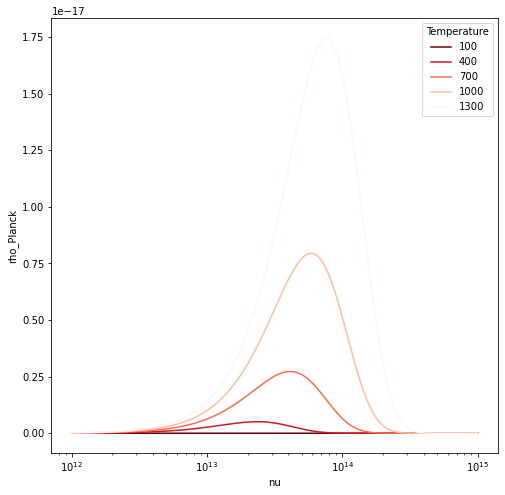

In [52]:
fig, ax = plt.subplots(figsize=(8,8),facecolor='white')
ax.set_facecolor('white')

sns.lineplot(data=df, x='nu', y='rho_Planck',
            hue= 'Temperature', palette='Reds_r',
            ax=ax)

ax.set_xscale('log')


In [50]:
alt.Chart(data=df).mark_line().encode(
    x = alt.X(shorthand='nu', type='quantitative',
        scale = alt.Scale(type='log'),
        axis = alt.Axis(format='.1e')
        ),
    y = alt.Y(shorthand='rho_Planck', type='quantitative',
        axis = alt.Axis( format='.1e')
        ),
    color = 'Temperature:O'
)\
.properties(width=400, height=400)

alt.Chart(...)